In [1]:
# imports
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from time import sleep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('fr_raw_data_jobs_uk.csv')

In [3]:
df.head()

,Unnamed: 0,Location,Title,Company,Salary,Description,City,jobs
0,0,NaN,Business Intelligence Analyst,Dynamic Planner,"£32,000 - £40,000 a year","Provision of accurate, accessible, and impactf...",Exeter,business+intelligence
1,1,NaN,Senior HR Advisor *Based in the South West* Pe...,Sitel,"£26,000 - £28,000 a year",We offer benefits to keep you healthy and happ...,Exeter,business+intelligence
2,2,NaN,Business Development Executive,Sigma Software Distribution,"£18,500 a year",Generate new business sales and opportunities:...,Exeter,business+intelligence
3,3,NaN,French Customer Service Advisor based in Exete...,Sitel,£10.50 an hour,We offer benefits to keep you healthy and happ...,Exeter,business+intelligence
4,4,NaN,German Customer Service Adviser based in Exete...,Sitel,£10.50 an hour,We offer benefits to keep you healthy and happ...,Exeter,business+intelligence


In [4]:
df.dtypes

Unnamed: 0      int64
Location       object
Title          object
Company        object
Salary         object
Description    object
City           object
jobs           object
dtype: object

In [5]:
# Drop duplicated columns
# df = df.loc[:,~df.columns.duplicated()]

In [6]:
df.shape

(83389, 8)

In [7]:
# dropping ALL duplicate values
df.drop_duplicates(subset=['Location', 
                           'Title', 
                           'Company', 
                           'Salary', 
                           'Description',
                           'City', 
                           'jobs']
                   ,keep = False,
                   inplace = True)
# dropping unnecessarily column
df.drop(['Unnamed: 0'], 
        axis=1,
       inplace = True)

# Check
df.shape

(8936, 7)

## Data Cleaning for predicter columns

In [8]:
# dropping rows where Salary is in null value
print(df.Salary.isna().sum())
df.dropna(subset=['Salary'],
         inplace = True)

5826


In [9]:
# check
df.Salary.isna().sum()

0

#### Cleaning Salary columns further

In [10]:
# df.Salary.value_counts()
df.Salary.unique()

array(['£25,000 a year', '£28,000 - £35,000 a year',
       '£28,000 - £36,000 a year', '£48,000 - £54,000 a year',
       '£19,452 a year', '£30,208 - £37,174 a year',
       '£33,618 - £36,369 a year', '£28,725 - £31,725 a year',
       '£57,721 a year', '£36,027 a year', '£40,000 a year',
       '£29,176 a year', '£18,500 - £19,500 a year',
       '£30,000 - £50,000 a year', '£16,162 - £19,964 a year',
       '£49,100 a year', '£27,511 - £31,866 a year', '£30,282 a year',
       '£38,890 - £44,503 a year', '£25,000 - £30,000 a year',
       '£25,000 - £55,000 a year', '£17,075 a year',
       '£3,000 - £3,200 a month', '£38,017 - £49,553 a year',
       '£35,000 - £40,000 a year', '£30,000 - £40,000 a year',
       '£40,000 - £45,000 a year', '£31,725 - £34,578 a year',
       '£26,350 a year', '£39,748 - £50,790 a year',
       '£34,000 - £38,000 a year', '£18,000 - £21,000 a year',
       '£32,000 - £40,000 a year', '£32,800 a year',
       '£25,000 - £50,000 a year', '£70,000 - £

In [11]:
# Goal is turning Salary related columns into quantitaive values
df = df[df.Salary.str.contains("hour") == False]
df = df[df.Salary.str.contains("day") == False]
df = df[df.Salary.str.contains("week") == False]
df = df[df.Salary.str.contains("month") == False]

df.shape

(2857, 7)

In [12]:
# Creating 3 new columns from Salary
df[['Salary_min', 'Salary_max']] = df['Salary'].str.split('-', 1, expand=True)

In [13]:
df.Salary_max.unique()

array([None, ' £35,000 a year', ' £36,000 a year', ' £54,000 a year',
       ' £37,174 a year', ' £36,369 a year', ' £31,725 a year',
       ' £19,500 a year', ' £50,000 a year', ' £19,964 a year',
       ' £31,866 a year', ' £44,503 a year', ' £30,000 a year',
       ' £55,000 a year', ' £49,553 a year', ' £40,000 a year',
       ' £45,000 a year', ' £34,578 a year', ' £50,790 a year',
       ' £38,000 a year', ' £21,000 a year', ' £75,000 a year',
       ' £65,000 a year', ' £25,000 a year', ' £85,000 a year',
       ' £90,000 a year', ' £34,728 a year', ' £36,540 a year',
       ' £21,713 a year', ' £27,041 a year', ' £40,322 a year',
       ' £42,793 a year', ' £60,000 a year', ' £47,380 a year',
       ' £28,000 a year', ' £53,291 a year', ' £57,603 a year',
       ' £59,880 a year', ' £43,500 a year', ' £23,000 a year',
       ' £29,051 a year', ' £38,558 a year', ' £37,890 a year',
       ' £24,157 a year', ' £38,153 a year', ' £33,749 a year',
       ' £96,909 a year', ' £51,66

In [14]:
df.Salary_min = df.Salary_min.str.replace('£', '')
df.Salary_max = df.Salary_max.str.replace('£', '')

df.Salary_min = df.Salary_min.str.replace(' ','')
df.Salary_max = df.Salary_max.str.replace(' ','')

df.Salary_min = df.Salary_min.str.replace(',','')
df.Salary_max = df.Salary_max.str.replace(',','')

df.Salary_min = df.Salary_min.str.replace('ayear','')
df.Salary_max = df.Salary_max.str.replace('ayear','')

df.Salary_min = df.Salary_min.astype('float64')
df.Salary_max = df.Salary_max.astype('float64')
# # .apply(pd.to_numeric)

df['Salary_ave'] = (df['Salary_min']+df['Salary_max'])/2

In [15]:
print(df.Salary_min.value_counts(ascending= True))
print(df.Salary_max.value_counts(ascending= True))
print(df.Salary_ave.value_counts(ascending= True))

26883.0      1
30001.0      1
40681.0      1
34918.0      1
43300.0      1
          ... 
50000.0    149
35000.0    173
25000.0    177
40000.0    214
30000.0    220
Name: Salary_min, Length: 434, dtype: int64
81000.0      1
33569.0      1
41850.0      1
53291.0      1
45594.0      1
          ... 
30000.0    100
35000.0    108
40000.0    109
45000.0    121
50000.0    126
Name: Salary_max, Length: 330, dtype: int64
57628.5      1
15776.5      1
60274.5      1
32873.0      1
102500.0     1
            ..
32500.0     62
55000.0     66
40000.0     66
45000.0     68
42500.0     70
Name: Salary_ave, Length: 448, dtype: int64


In [16]:
df.drop(['Salary'], 
        axis=1,
       inplace = True)

In [17]:
df.head()

,Location,Title,Company,Description,City,jobs,Salary_min,Salary_max,Salary_ave
7,Exeter,Graduate Operational Management Programme,South West Water,"Joining us on a full-time, permanent basis, yo...",Exeter,business+intelligence,25000.0,NaN,NaN
8,Exeter EX2 7HR,Graduate Operational Management Programme,Graduate,"Joining us on a full-time, permanent basis, yo...",Exeter,business+intelligence,25000.0,NaN,NaN
11,Exeter,Junior Project Manager,OfficeLabs,OfficeLabs are an information management & tec...,Exeter,business+intelligence,28000.0,35000.0,31500.0
13,NaN,Research Analyst - Portuguese Speaking,Metrica Recruitment,This boutique business have a 20 year history ...,Exeter,business+intelligence,28000.0,36000.0,32000.0
15,Exeter,Business Development Manager,YTKO Ltd,Business development: 4 years (Preferred).\nYo...,Exeter,business+intelligence,48000.0,54000.0,51000.0


In [18]:
print(f'Total # of Salary_max rows:', len(df.Salary_max))
print(f'Total # of Null Salary_max rows:', df.Salary_max.isna().sum())
df.Salary_max.describe()

Total # of Salary_max rows: 2857
Total # of Null Salary_max rows: 754


count      2103.000000
mean      45647.320019
std       20109.564006
min       11313.000000
25%       31916.000000
50%       40322.000000
75%       55000.000000
max      200000.000000
Name: Salary_max, dtype: float64

<AxesSubplot:>

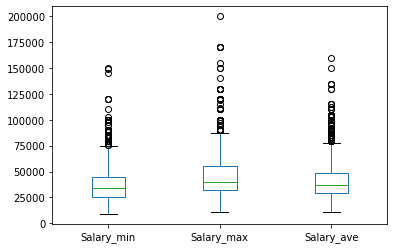

In [19]:
df.plot.box()

From the observation of the box plot above, since there are more outliers in salaries higher than the average. I decided to fill NaN with the median 

In [20]:
df.Salary_max.fillna(df.Salary_max.median(),inplace=True)
df.Salary_ave.fillna(df.Salary_ave.median(),inplace=True)

In [21]:
# check
print(f'# of NaN in Salary_max :', df.Salary_max.isna().sum())
print(f'# of NaN in Salary_ave :', df.Salary_ave.isna().sum())

# of NaN in Salary_max : 0
# of NaN in Salary_ave : 0


In [22]:
# Converting '£' to '$'
df.Salary_min = df.Salary_min.apply(lambda x: x*1.19)
df.Salary_max = df.Salary_min.apply(lambda x: x*1.19)
df.Salary_ave = df.Salary_min.apply(lambda x: x*1.19)

In [23]:
median = df['Salary_ave'].median()
print ('The median salary for our data set is $' + str(median))

The median salary for our data set is $47859.9317


In [24]:
def above_median(x):
    if x > median:
        return 1
    return 0

df['Median'] = df['Salary_ave'].apply(above_median)
df.head()

,Location,Title,Company,Description,City,jobs,Salary_min,Salary_max,Salary_ave,Median
7,Exeter,Graduate Operational Management Programme,South West Water,"Joining us on a full-time, permanent basis, yo...",Exeter,business+intelligence,29750.0,35402.5,35402.5,0
8,Exeter EX2 7HR,Graduate Operational Management Programme,Graduate,"Joining us on a full-time, permanent basis, yo...",Exeter,business+intelligence,29750.0,35402.5,35402.5,0
11,Exeter,Junior Project Manager,OfficeLabs,OfficeLabs are an information management & tec...,Exeter,business+intelligence,33320.0,39650.8,39650.8,0
13,NaN,Research Analyst - Portuguese Speaking,Metrica Recruitment,This boutique business have a 20 year history ...,Exeter,business+intelligence,33320.0,39650.8,39650.8,0
15,Exeter,Business Development Manager,YTKO Ltd,Business development: 4 years (Preferred).\nYo...,Exeter,business+intelligence,57120.0,67972.8,67972.8,1


## Data Cleaning for predicter columns

In [25]:
df.columns

Index(['Location', 'Title', 'Company', 'Description', 'City', 'jobs',
       'Salary_min', 'Salary_max', 'Salary_ave', 'Median'],
      dtype='object')

### Location and City

In [26]:
print(df[['City', 'Location']].head(10))
print(df[['City', 'Location']].tail(10))
# Since Location and City are related, I chose to drop Location and leave City
df.drop(columns='Location', inplace=True)

        City         Location
7     Exeter           Exeter
8     Exeter   Exeter EX2 7HR
11    Exeter           Exeter
13    Exeter              NaN
15    Exeter           Exeter
765  Cardiff         Bridgend
767  Cardiff     Cardiff CF10
769  Cardiff  Portishead BS20
770  Cardiff         Bridgend
772  Cardiff     Cardiff CF10
         City           Location
82672  Oxford       Stokenchurch
82673  Oxford  Abingdon OX14 4SD
82675  Oxford            Reading
82677  Oxford           Bicester
82678  Oxford            Reading
82679  Oxford            Reading
82682  Oxford           Abingdon
82685  Oxford           Bicester
82780  Oxford                NaN
83361  Oxford     Oxford OX1 1DW


### Title, Company, Description, Job

In [27]:
print(f'# of NaN in Title :', df.Title.isna().sum())
print(f'# of NaN in Company :', df.Company.isna().sum())
print(f'# of NaN in Description :', df.Description.isna().sum())
print(f'# of NaN in Job :', df.jobs.isna().sum())

# of NaN in Title : 0
# of NaN in Company : 0
# of NaN in Description : 0
# of NaN in Job : 0


In [28]:
df

,Title,Company,Description,City,jobs,Salary_min,Salary_max,Salary_ave,Median
7,Graduate Operational Management Programme,South West Water,"Joining us on a full-time, permanent basis, yo...",Exeter,business+intelligence,29750.0,35402.50,35402.50,0
8,Graduate Operational Management Programme,Graduate,"Joining us on a full-time, permanent basis, yo...",Exeter,business+intelligence,29750.0,35402.50,35402.50,0
11,Junior Project Manager,OfficeLabs,OfficeLabs are an information management & tec...,Exeter,business+intelligence,33320.0,39650.80,39650.80,0
13,Research Analyst - Portuguese Speaking,Metrica Recruitment,This boutique business have a 20 year history ...,Exeter,business+intelligence,33320.0,39650.80,39650.80,0
15,Business Development Manager,YTKO Ltd,Business development: 4 years (Preferred).\nYo...,Exeter,business+intelligence,57120.0,67972.80,67972.80,1
...,...,...,...,...,...,...,...,...,...
82679,Sales Support Administrator,Pertemps Network Group,Inputting data onto our inhouse database to tr...,Oxford,database+administrator,21420.0,25489.80,25489.80,0
82682,Customer Service Administrator,BRELLIS RECRUITMENT LIMITED,Ensure customer database is regularly updated ...,Oxford,database+administrator,26775.0,31862.25,31862.25,0
82685,Accounts Assistant,Equation Recruitment,Job Type Permanent Full Time.\nTo be successfu...,Oxford,database+administrator,27370.0,32570.30,32570.30,0
82780,IT Officer - Systems Administrator,Pembroke College,This role will specialise in Windows/Linux ser...,Oxford,database+administrator,39270.0,46731.30,46731.30,0


In [29]:
# # Consider the keywords
# pd.set_option('display.max_rows', 3000)
# result = df.Title.to_string(index=False)
# print(result)

In [30]:
df = df[df['Title'].str.contains('Data|Scientist|Machine|Intelligence|Analyst',
                                                 case=False, regex=True)]
df

,Title,Company,Description,City,jobs,Salary_min,Salary_max,Salary_ave,Median
13,Research Analyst - Portuguese Speaking,Metrica Recruitment,This boutique business have a 20 year history ...,Exeter,business+intelligence,33320.00,39650.8000,39650.8000,0
765,Intern - Performance & Business Intelligence,South Wales Police,You will be involved in gathering data and con...,Cardiff,business+intelligence,23147.88,27545.9772,27545.9772,0
769,Business Intelligence Developer,Avon and Somerset Constabulary,Drawing on expert technical capabilities and t...,Cardiff,business+intelligence,40005.42,47606.4498,47606.4498,0
780,Business Analyst,LookAfterMyBills,Extensive experience within a business intelli...,Cardiff,business+intelligence,47600.00,56644.0000,56644.0000,1
782,Intern - Data Science,South Wales Police,The Business Intelligence Unit seeks to expand...,Cardiff,business+intelligence,23147.88,27545.9772,27545.9772,0
...,...,...,...,...,...,...,...,...,...
80205,Telephone Researcher / Marketing Data Administ...,SpaMedica,This role will support the development of the ...,Manchester,database+administrator,20825.00,24781.7500,24781.7500,0
80854,Database Administrator,HRC Recruitment,You will have background experience working wi...,Glasgow,database+administrator,23800.00,28322.0000,28322.0000,0
81587,Membership Database Administrator,Royal Society of Wildlife Trusts,"Excellent administration, data entry, customer...",Belfast,database+administrator,21420.00,25489.8000,25489.8000,0
82659,Business Systems Database Administrator,CCFE,A good understanding of the use and versatilit...,Oxford,database+administrator,22610.00,26905.9000,26905.9000,0


In [31]:
df

,Title,Company,Description,City,jobs,Salary_min,Salary_max,Salary_ave,Median
13,Research Analyst - Portuguese Speaking,Metrica Recruitment,This boutique business have a 20 year history ...,Exeter,business+intelligence,33320.00,39650.8000,39650.8000,0
765,Intern - Performance & Business Intelligence,South Wales Police,You will be involved in gathering data and con...,Cardiff,business+intelligence,23147.88,27545.9772,27545.9772,0
769,Business Intelligence Developer,Avon and Somerset Constabulary,Drawing on expert technical capabilities and t...,Cardiff,business+intelligence,40005.42,47606.4498,47606.4498,0
780,Business Analyst,LookAfterMyBills,Extensive experience within a business intelli...,Cardiff,business+intelligence,47600.00,56644.0000,56644.0000,1
782,Intern - Data Science,South Wales Police,The Business Intelligence Unit seeks to expand...,Cardiff,business+intelligence,23147.88,27545.9772,27545.9772,0
...,...,...,...,...,...,...,...,...,...
80205,Telephone Researcher / Marketing Data Administ...,SpaMedica,This role will support the development of the ...,Manchester,database+administrator,20825.00,24781.7500,24781.7500,0
80854,Database Administrator,HRC Recruitment,You will have background experience working wi...,Glasgow,database+administrator,23800.00,28322.0000,28322.0000,0
81587,Membership Database Administrator,Royal Society of Wildlife Trusts,"Excellent administration, data entry, customer...",Belfast,database+administrator,21420.00,25489.8000,25489.8000,0
82659,Business Systems Database Administrator,CCFE,A good understanding of the use and versatilit...,Oxford,database+administrator,22610.00,26905.9000,26905.9000,0


In [32]:
# df.to_csv('Indeed_cleaned_including_description.csv', encoding='utf-8')

In [33]:
df.drop(columns = 'Description', inplace=True)

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
# df.to_csv('Indeed_cleaned.csv', encoding='utf-8')